# Neural network Tuning

In [1]:
!pip install scikeras

In [2]:
# Importing necesary packages
import numpy
import pandas as pd
from sklearn.model_selection import GridSearchCV
from keras.models import Sequential
from keras.layers import Dense
import warnings
warnings.filterwarnings('ignore')
from scikeras.wrappers import KerasClassifier

# part 1 - Tuning batch and epoch

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
%cd "/content/drive/MyDrive/Deep Learning Course"

/content/drive/MyDrive/Deep Learning Course


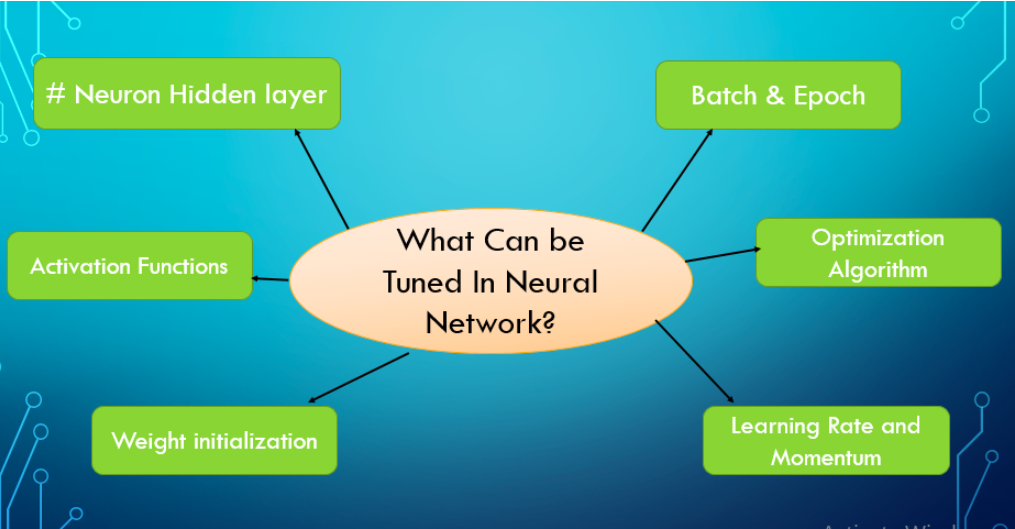

In [5]:
from IPython.display import Image
Image(filename='opti.png')

In [6]:
# load the dataset for India diabetes
data = pd.read_csv('diabetes.csv')

In [7]:
#viewing data
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [8]:
# split into predictors and response
X = data.iloc[:,0:8] #predictors
Y = data.iloc[:,8] #response

In [9]:
# Function to create model,for KerasClassifier
def create_my_model():
    #defining my model
    mymodel = Sequential()
    mymodel.add(Dense(12, input_dim=8, activation='relu'))
    mymodel.add(Dense(1, activation='sigmoid'))

    # Compile the model
    mymodel.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return mymodel

To use KerasClassifier with GridSearchCV, we need to define a Keras model as a function and pass it to the KerasClassifier.

In [10]:
# create model
model = KerasClassifier(build_fn=create_my_model)

In [11]:
# define the grid search parameters
batchSize = [10, 20, 40, 60, 80, 100]
epochs = [10, 30, 50]

GridSearchCV is a function from the scikit-learn library in Python used for hyperparameter tuning of machine learning models.

The GridSearchCV function takes as input a machine learning model (estimator), a dictionary of hyperparameters to search over (param_grid), and optionally other parameters like cross-validation strategy (cv), scoring method (scoring), and more.

In [12]:
parameter_grid = dict(batch_size=batchSize, epochs=epochs)


mygrid = GridSearchCV(estimator=model, param_grid=parameter_grid, n_jobs=-1, cv=3)
grid_result = mygrid.fit(X, Y)

Epoch 1/50
39/39 [==============================] - 1s 2ms/step - loss: 15.4444 - accuracy: 0.5482
Epoch 2/50
39/39 [==============================] - 0s 2ms/step - loss: 9.0929 - accuracy: 0.4948
Epoch 3/50
39/39 [==============================] - 0s 2ms/step - loss: 5.2821 - accuracy: 0.4596
Epoch 4/50
39/39 [==============================] - 0s 2ms/step - loss: 3.8259 - accuracy: 0.5065
Epoch 5/50
39/39 [==============================] - 0s 2ms/step - loss: 3.2466 - accuracy: 0.5273
Epoch 6/50
39/39 [==============================] - 0s 2ms/step - loss: 2.8301 - accuracy: 0.5365
Epoch 7/50
39/39 [==============================] - 0s 2ms/step - loss: 2.4998 - accuracy: 0.5365
Epoch 8/50
39/39 [==============================] - 0s 2ms/step - loss: 2.0660 - accuracy: 0.5560
Epoch 9/50
39/39 [==============================] - 0s 2ms/step - loss: 1.7146 - accuracy: 0.5534
Epoch 10/50
39/39 [==============================] - 0s 2ms/step - loss: 1.4383 - accuracy: 0.5794
Epoch 11/50
39/39 

In [13]:
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best: 0.684896 using {'batch_size': 20, 'epochs': 50}


# part 2- Optimizing Activation Function

In [14]:
# Function to create model
def create_my_model(optimizer='adam'):
    # create model
    mymodel = Sequential()
    mymodel.add(Dense(12, input_dim=8, activation='relu'))
    mymodel.add(Dense(1, activation='sigmoid'))
    # Compile model
    mymodel.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return mymodel

In [15]:
# create model
model = KerasClassifier(build_fn=create_my_model, epochs=50, batch_size=10)

In [16]:
# define the grid search parameters
optimizer = ['SGD','Adadelta', 'RMSprop', 'Adagrad','Adam']
parameter_grid = dict(optimizer=optimizer)

In [17]:
grid = GridSearchCV(estimator=model, param_grid=parameter_grid, n_jobs=-1, cv=3)
grid_result = grid.fit(X, Y)

Epoch 1/50
77/77 [==============================] - 1s 2ms/step - loss: 3.8521 - accuracy: 0.4531
Epoch 2/50
77/77 [==============================] - 0s 2ms/step - loss: 2.3535 - accuracy: 0.4388
Epoch 3/50
77/77 [==============================] - 0s 2ms/step - loss: 1.5723 - accuracy: 0.5000
Epoch 4/50
77/77 [==============================] - 0s 2ms/step - loss: 1.2061 - accuracy: 0.5286
Epoch 5/50
77/77 [==============================] - 0s 2ms/step - loss: 1.0390 - accuracy: 0.6029
Epoch 6/50
77/77 [==============================] - 0s 2ms/step - loss: 0.9634 - accuracy: 0.6133
Epoch 7/50
77/77 [==============================] - 0s 2ms/step - loss: 0.8876 - accuracy: 0.6562
Epoch 8/50
77/77 [==============================] - 0s 2ms/step - loss: 0.8465 - accuracy: 0.6289
Epoch 9/50
77/77 [==============================] - 0s 2ms/step - loss: 0.7997 - accuracy: 0.6549
Epoch 10/50
77/77 [==============================] - 0s 2ms/step - loss: 0.7507 - accuracy: 0.6615
Epoch 11/50
77/77 [

In [18]:
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best: 0.701823 using {'optimizer': 'Adam'}


# How can you improve accuracy of the model?